Saved plot to BayesRADD/mc_marginal_ppl.png


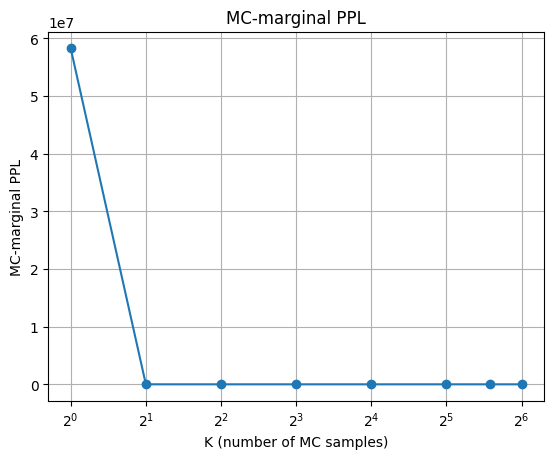

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import json

# Path to your JSON file
with open("BayesRADD/mc_ppl_values.json", "r") as f:
    data = json.load(f)

# Extract
Ks   = np.array(data["K"]).reshape(-1, 1)
ppls = np.array(data["ppl"])

# Extract
#Ks   = np.array([2,3,4,8,16,24]).reshape(-1, 1)
#ppls = np.array([4.58, 3.21, 2.79, 2.45, 2.35, 2.32])

#with open("BayesRADD/mc_ppl_values.json", "w") as f:
#    json.dump({"K": Ks.tolist(), "ppl": ppls.tolist()}, f)

# Plot
plt.figure()
plt.plot(Ks, ppls, marker='o')
plt.xlabel("K (number of MC samples)")
plt.ylabel("MC-marginal PPL")
plt.xscale("log", base=2)
#plt.xticks(Ks, [f"$2^{{{int(np.log2(k))}}}$" for k in Ks])
plt.title(f"MC-marginal PPL")
plt.grid(True)
# Save then show
out_path = f"BayesRADD/mc_marginal_ppl.png"
plt.savefig(out_path, bbox_inches="tight")
print(f"Saved plot to {out_path}")
plt.show()

Asymptotic floor (a)        = 5.66
Variance coefficient (b)     = 45.85
Jensen‐slack coefficient (c) = 1164.94
Fit R²                       = 0.999
Saved plot to BayesRADD/mc_marginal_ppl_fit.png


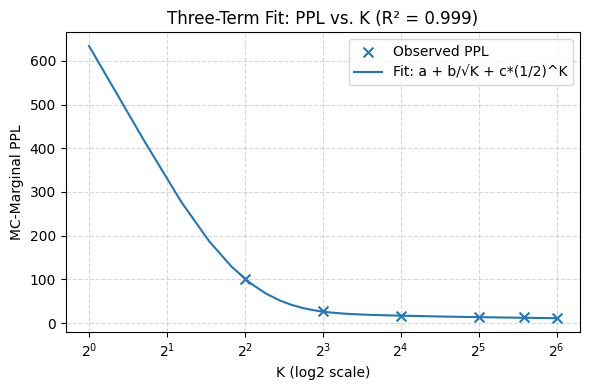

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
Ks = Ks[2:]
ppls = ppls[2:]
Ks_float = Ks.ravel()

# Define the model: a + b / sqrt(K) + c * (1/2)^K
def ppl_model(K, a, b, c):
    return a + b / np.sqrt(K) + c * (0.5 ** K)

# Fit the model using curve_fit
params, _ = curve_fit(ppl_model, Ks_float, ppls)
a, b, c = params

# Predict using fitted model
Ks_plot = np.linspace(1, 64, 100)
ppl_pred = ppl_model(Ks_plot, a, b, c)

# Compute R² manually
residuals = ppls - ppl_model(Ks_float, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ppls - np.mean(ppls))**2)
r2 = 1 - (ss_res / ss_tot)

# Print fit results
print(f"Asymptotic floor (a)        = {a:.2f}")
print(f"Variance coefficient (b)     = {b:.2f}")
print(f"Jensen‐slack coefficient (c) = {c:.2f}")
print(f"Fit R²                       = {r2:.3f}")

# Plot observed vs fitted curve
plt.figure(figsize=(6, 4))
plt.scatter(Ks, ppls, label="Observed PPL", s=50, marker='x')
plt.plot(Ks_plot, ppl_pred, label="Fit: a + b/√K + c*(1/2)^K", linestyle='-')
plt.xscale('log', base=2)
plt.xlabel("K (log2 scale)")
plt.ylabel("MC‐Marginal PPL")
plt.title(f"Three‐Term Fit: PPL vs. K (R² = {r2:.3f})")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
# Save then show
out_path = f"BayesRADD/mc_marginal_ppl_fit.png"
plt.savefig(out_path, bbox_inches="tight")
print(f"Saved plot to {out_path}")
plt.show()